In [63]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 


In [64]:
data = pd.read_csv('Iris.csv')

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [66]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [67]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [68]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['Id', 'Species'])
y = data[['Species']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)


In [69]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict =lr.predict(X_test)


C:\Users\dong phuong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dong phuong\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dong phuong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit (X_train,y_train)
dtc_predict = dtc.predict(X_test)

# Random Forest 

In [71]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)

C:\Users\dong phuong\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dong phuong\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


# Hyperparameter tuning

C:\Users\dong phuong\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\dong phuong\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\dong phuong\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\dong phuong\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\dong phuong\Anaconda3\lib\site-packages\ipykernel_launcher.py:8

[0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 1.0, 0.9666666666666667, 0.9666666666666667]


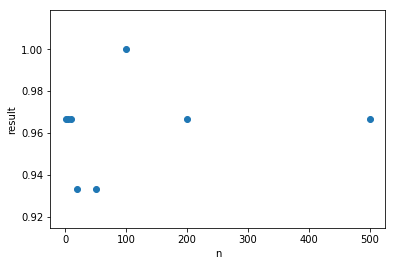

In [74]:
#Create the array of n to set of n_estinamtors 
n = [1 ,5 ,10, 20, 50, 100, 200, 500]
#Define a 'result' array to save the accuracy score 
result = []

for i in n:
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    result.append(accuracy_score(y_test, predictions))    
# Last step let's plot n and result on a grid using plt.scatter()
plt.scatter(n, result)
plt.xlabel('n')
plt.ylabel('result')
print(result)

# Evaluate

Accuracy Score 

In [73]:
from sklearn.metrics import accuracy_score
print ('Accuracy Score of Decision Tree Classifier: ', accuracy_score(y_test, dtc_predict))
print ('Accuracy Score of Random Forest Classifier', accuracy_score(y_test, rfc_predict))
print ('Accuracy Score of Logistic Regression', accuracy_score(y_test, lr_predict))

Accuracy Score of Decision Tree Classifier:  0.9666666666666667
Accuracy Score of Random Forest Classifier 0.9666666666666667
Accuracy Score of Logistic Regression 0.9666666666666667


Confusion Matrixs && Classifier Report

In [82]:
from sklearn.metrics import confusion_matrix, classification_report

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.88      0.93         8

      micro avg       0.97      0.97      0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



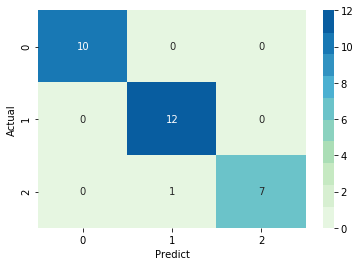

In [88]:
# Confusion Matrix of Decision Tree Classifier
dtc_cm = confusion_matrix(y_test, dtc_predict)
sns.heatmap(dtc_cm,cmap =sns.color_palette("GnBu", 10), annot = True, fmt="d" )
plt.xlabel('Predict')
plt.ylabel('Actual')
# Print out the classification_report 
print(classification_report(y_test, dtc_predict))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.88      0.93         8

      micro avg       0.97      0.97      0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



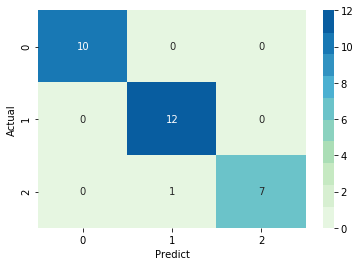

In [91]:
# Confusion Matrix of Random Forest Classifier 
rfc_cm = confusion_matrix(y_test, rfc_predict)
sns.heatmap(rfc_cm , cmap = sns.color_palette("GnBu", 10), annot = True, fmt="d")
plt.xlabel('Predict')
plt.ylabel('Actual')

# print out the classification_report

print (classification_report(y_test, rfc_predict))

Regression Problem 

In [92]:
import math 
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, lr_predict)

ValueError: could not convert string to float: 'Iris-setosa'